# Lab 12 Building Parsimonious Models - [25 points] - Solutions


## <u>Case Study</u>: Creating an Classifer Model that will Accurately Predict whether an Instagram Account is Fake or Real *with New Data*

We will revisit the fake_insta_cleaned.csv dataset one more time with a different research goal in mind now. In lab 11, we assess how well our model would be at preciting fake accounts in the just the *dataset that we were given*. Now, we would like to build a model that will make accurate predictions *for new datasets*.

We will build a logistic regression model that predicts the probability that an account is fake, using the following explanatory variables.
* the number of accounts someone *follows*
* number of *followers*
* number of posts
* number of words in name
* number of characters in the bio
* whether they have a profile picture or not




## Imports

In [49]:
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()                              # sets the default plotting style
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from scipy.stats import chi2

## 1. Data Preliminaries
### 1.1 [0.5 pt] Read the fake_insta_cleaned.csv into a dataframe called df.

In [50]:
df = pd.read_csv("fake_insta_cleaned.csv")

In [51]:
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type
0,yes,1,30,35,488,604,real
1,yes,5,64,3,35,6,real
2,yes,2,82,319,328,668,real
3,yes,1,76,6,225,356,real
4,yes,1,0,6,362,424,real


### 1.2. [0.5 pt] Next, create a new variable y in df that is equal to 1 when the the account is fake and that is equal to 0 when the account is real.

In [52]:
df['y']=df['account_type'].map({'real':0,'fake':1})
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type,y
0,yes,1,30,35,488,604,real,0
1,yes,5,64,3,35,6,real,0
2,yes,2,82,319,328,668,real,0
3,yes,1,76,6,225,356,real,0
4,yes,1,0,6,362,424,real,0


## 2. Training and Test Data

First, we want to create a training dataset to train the dataset and a test dataset to test the model's performance.

### 2.1. [2 pts] First, create a training dataset and a test dataset where:
* the training dataset is comprised of a random sample of 85% of the rows in our dataframe,
* the test dataset is comprised of the remaining 15% of rows in the dataframe, and
* we use a random state of 456.

In [53]:
train, test = train_test_split(df, test_size=0.15, random_state=456)

In [54]:
print("Training dataset size: ", train.shape[0])

Training dataset size:  95


In [55]:

print("Testing dataset size: ", test.shape[0])

Testing dataset size:  17


## 3. Full Model

Next, we would like for our 'full model' to predict the probability that an account is fake, using ALL of the following available explanatory variables.
* the number of accounts someone *follows*
* number of *followers*
* number of posts
* number of words in name
* number of characters in the bio
* whether they have a profile picture or not

### 3.1. [1 pt] Fit the full model with all six of these explanatory variables using just your *training dataset*.

In [56]:
fullmodel = smf.logit('y ~ number_of_follows+number_of_followers+number_of_posts+number_of_words_in_name+	num_characters_in_bio+has_a_profile_pic', data=train).fit()
fullmodel.summary()

         Current function value: 0.122645
         Iterations: 35


C:\Users\MJHam\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   95
Model:                          Logit   Df Residuals:                       88
Method:                           MLE   Df Model:                            6
Date:                Wed, 05 May 2021   Pseudo R-squ.:                  0.8227
Time:                        14:05:29   Log-Likelihood:                -11.651
converged:                      False   LL-Null:                       -65.717
Covariance Type:            nonrobust   LLR p-value:                 5.015e-21
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  106.9158    1.2e+05      0.001      0.999   -2.35e+05    2.35e+05
has_a_profile_pic[T.yes]  -101.7707    1.2e+05     -0.001      0.999   -2.35e+05    2.35e+05
number_of_follows            0.0098      0.003      3.168      0.002       0.004       0.016
number_of_followers         -0.0299      0.010     -3.107      0.002      -0.049      -0.011
number_of_posts              0.0084      0.009      0.973      0.331      -0.009       0.025
number_of_words_in_name     -1.4222      0.621     -2.290      0.022      -2.640      -0.205
num_characters_in_bio       -0.1171      0.053     -2.201      0.028      -0.221      -0.013
============================================================================================

Possibly complete quasi-separation: A fraction 0.52 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## 4.  [4 pts]  Backwards Elimination

Next, starting with the full model, use a backwards elimination algorithm that seeks to find the model with the lowest **AIC** score. You should fit each of these models in the algorithm with *just the training dataset*. Once the algorithm has stopped, print out the summary output of your **final model**. 

In [57]:

print('ITERATION 1: AIC of the Current Model', fullmodel.aic)

ITERATION 1: AIC of the Current Model 37.30246959104126


In [58]:
test_mod = smf.logit('y~number_of_follows+number_of_followers+number_of_posts+number_of_words_in_name+num_characters_in_bio', data=train).fit()
print('AIC of Training Model that Deletes has_a_profile_pic from the current model', test_mod.aic)

Optimization terminated successfully.
         Current function value: 0.329550
         Iterations 9
AIC of Training Model that Deletes has_a_profile_pic from the current model 74.61454076684929


In [59]:
test_mod = smf.logit('y~number_of_follows+number_of_followers+number_of_posts+number_of_words_in_name+has_a_profile_pic', data=train).fit()
print('AIC of Training Model that Deletes Number of Characters in bio from the current model', test_mod.aic)

         Current function value: 0.206117
         Iterations: 35
AIC of Training Model that Deletes Number of Characters in bio from the current model 51.16232420711868


C:\Users\MJHam\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [60]:
test_mod = smf.logit('y~number_of_follows+number_of_followers+number_of_posts+num_characters_in_bio+has_a_profile_pic', data=train).fit()
print('AIC of Training Model that Deletes number of words in name from the current model', test_mod.aic)

         Current function value: 0.150957
         Iterations: 35
AIC of Training Model that Deletes number of words in name from the current model 40.681911322586714


C:\Users\MJHam\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [61]:
test_mod = smf.logit('y~number_of_follows+number_of_followers+number_of_words_in_name+num_characters_in_bio+has_a_profile_pic', data=train).fit()
print('AIC of Training Model that Deletes number of posts from the current model', test_mod.aic)

         Current function value: 0.125481
         Iterations: 35
AIC of Training Model that Deletes number of posts from the current model 35.84137144664037


C:\Users\MJHam\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [62]:
test_mod = smf.logit('y~number_of_follows+number_of_posts+number_of_words_in_name+num_characters_in_bio+has_a_profile_pic', data=train).fit()
print('AIC of Training Model that Deletes number of followers from the current model', test_mod.aic)

         Current function value: 0.276135
         Iterations: 35
AIC of Training Model that Deletes number of followers from the current model 64.46572563330452


C:\Users\MJHam\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [63]:
test_mod = smf.logit('y~number_of_followers+number_of_posts+number_of_words_in_name+num_characters_in_bio+has_a_profile_pic', data=train).fit()
print('AIC of Training Model that Deletes number of follows from the current model', test_mod.aic)

         Current function value: 0.331365
         Iterations: 35
AIC of Training Model that Deletes number of follows from the current model 74.95943769115173


C:\Users\MJHam\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
redmodel = smf.logit('y ~ number_of_follows+number_of_followers+number_of_words_in_name+num_characters_in_bio+has_a_profile_pic', data=train).fit()
print('ITERATION 2: AIC of the Current Model', redmodel.aic)

         Current function value: 0.125481
         Iterations: 35
ITERATION 2: AIC of the Current Model 35.84137144664037


C:\Users\MJHam\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [65]:
test_mod = smf.logit('y~number_of_follows+number_of_followers+number_of_words_in_name+num_characters_in_bio', data=train).fit()
print('AIC of Training Model that Deletes has_a_profile_pic from the current model', test_mod.aic)

Optimization terminated successfully.
         Current function value: 0.343064
         Iterations 9
AIC of Training Model that Deletes has_a_profile_pic from the current model 75.1822506514567


In [66]:
test_mod = smf.logit('y~number_of_follows+number_of_followers+number_of_words_in_name+has_a_profile_pic', data=train).fit()
print('AIC of Training Model that Deletes Number of Characters in bio from the current model', test_mod.aic)

         Current function value: 0.223078
         Iterations: 35
AIC of Training Model that Deletes Number of Characters in bio from the current model 52.38490360482747


C:\Users\MJHam\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [67]:
test_mod = smf.logit('y~number_of_follows+number_of_followers+num_characters_in_bio+has_a_profile_pic', data=train).fit()
print('AIC of Training Model that Deletes number of words in name from the current model', test_mod.aic)

         Current function value: 0.152157
         Iterations: 35
AIC of Training Model that Deletes number of words in name from the current model 38.90975282591792


C:\Users\MJHam\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [68]:
test_mod = smf.logit('y~number_of_follows+number_of_words_in_name+num_characters_in_bio+has_a_profile_pic', data=train).fit()
print('AIC of Training Model that Deletes number of followers from the current model', test_mod.aic)

         Current function value: 0.286734
         Iterations: 35
AIC of Training Model that Deletes number of followers from the current model 64.47943290808561


C:\Users\MJHam\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [69]:
test_mod = smf.logit('y~number_of_followers+number_of_words_in_name+num_characters_in_bio+has_a_profile_pic', data=train).fit()
print('AIC of Training Model that Deletes number of follows from the current model', test_mod.aic)

         Current function value: 0.344200
         Iterations: 35
AIC of Training Model that Deletes number of follows from the current model 75.39806057027371


C:\Users\MJHam\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [70]:
final_mod = smf.logit('y ~ number_of_follows+number_of_followers+number_of_words_in_name+num_characters_in_bio+has_a_profile_pic', data=train).fit()
final_mod.summary()

         Current function value: 0.125481
         Iterations: 35


C:\Users\MJHam\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   95
Model:                          Logit   Df Residuals:                       89
Method:                           MLE   Df Model:                            5
Date:                Wed, 05 May 2021   Pseudo R-squ.:                  0.8186
Time:                        14:05:32   Log-Likelihood:                -11.921
converged:                      False   LL-Null:                       -65.717
Covariance Type:            nonrobust   LLR p-value:                 1.321e-21
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.9262   2.29e+05      0.000      1.000    -4.5e+05     4.5e+05
has_a_profile_pic[T.yes]   -98.8981   2.29e+05     -0.000      1.000    -4.5e+05     4.5e+05
number_of_follows            0.0093      0.003      3.211      0.001       0.004       0.015
number_of_followers         -0.0284      0.009     -3.146      0.002      -0.046      -0.011
number_of_words_in_name     -1.3617      0.606     -2.246      0.025      -2.550      -0.173
num_characters_in_bio       -0.1060      0.050     -2.141      0.032      -0.203      -0.009
============================================================================================

Possibly complete quasi-separation: A fraction 0.51 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## 5. Parsimonious Model Evaluation

### 5.1.  [2 pt]  Compare the BIC score from your final model (from 4) to your full model (from 3). Use the BIC score to assess which of these models is more of a parsimonious model.

In [71]:
print("Full Model BIC: ", fullmodel.bic)

Full Model BIC:  55.17960783224504


In [72]:
print("Final Model BIC: ", final_mod.bic)

Final Model BIC:  51.164632796243616


The final model is more parsimonious because the BIC is lower, which tend to have better goodness of fit.

### 5.2. Perform a log likelihood ratio test, where your full model (from 3) is your full model and your reduced model is your "final model" (from 4).

#### 5.2.1.  [1.5 pt]  Set up your hypotheses for this test below.

Ho: Reduced model is correct
Ha: Reduced model is incorrect because the missing 'party' coefficient in Reduced model is not

#### 5.2.2.  [2 pt]  Calculate the test statistic for this test.

In [73]:
final_mod.llf, fullmodel.llf

(-11.920685723320187, -11.651234795520628)

In [74]:
final_mod.df_model, fullmodel.df_model

(5.0, 6.0)

In [75]:
llf_red, df_red = final_mod.llf, final_mod.df_model
llf_full, df_full = fullmodel.llf, fullmodel.df_model
llr, dfdiff = -2*(llf_red - llf_full), df_full - df_red
pd.DataFrame({'-2*llf': [-2*llf_red, -2*llf_full, llr], 'df_model': [df_red, df_full, dfdiff]}, index=['reduced model', 'full model', 'diff'])

,-2*llf,df_model
reduced model,23.841371,5.0
full model,23.302470,6.0
diff,0.538902,1.0


#### 5.2.3.  [2pt]  Calculate the p-value for this test.

The degrees of freedom that we use for this test is df=q=1, which represents the number of slopes that are in the full model, but not in the reduced model.

In [76]:
1 - chi2.cdf(llr, df=dfdiff)

0.462888189706517

#### 5.2.4.  [1.5 pt]  Make a decision about your hypotheses using a significance level of $\alpha=0.05$.

Because the p value is 0.463 > alpha = 0.05, we fail to reject the null hypothesis. Thus there is no sufficient evidence that the reduced model is incorrect.

## 6. More About Models

### 6.1.  [1 pt]  Considering the six possible explanatory variables we *could* include in a logistic regression, how many possible logistic regression models could we create with this dataset?

In [77]:
print(2**6 - 1)

63


### 6.2.  [1.5 pt]  Which of the following logistic regression models would be *less likely* to be overfit the model (using the training data)? Explain.
a. A model that predicts fake accounts using: number_of_followers and number_of_follows? 

b. A model that predicts fake accounts using: num_characters_in_bio and number_of_words_in_name? 

In [78]:
mod_one = smf.logit('y ~ number_of_follows+number_of_followers', data=train).fit()
mod_one.bic

Optimization terminated successfully.
         Current function value: 0.592487
         Iterations 7


126.23425413736027

In [79]:
mod_two = smf.logit('y ~ number_of_words_in_name+num_characters_in_bio', data=train).fit()
mod_two.bic

Optimization terminated successfully.
         Current function value: 0.424546
         Iterations 8


94.3253997708737

Model b would be less likely to overfit the model because it has a lower BIC score. 

## 7. Model Testing

Finally, we would like to test our "final model" (from 4) on the **test dataset**.

### 7.1.  [2 pt]  Plot the ROC and calculate the AUC for the "final model" (from 4) with the *test dataset*.

In [80]:
pewmod = smf.logit('y ~ number_of_follows+number_of_followers+number_of_words_in_name+num_characters_in_bio+has_a_profile_pic', data=train).fit()
phat_test = pewmod.predict(exog=test[['number_of_follows','number_of_followers', 'number_of_words_in_name', 'num_characters_in_bio', 'has_a_profile_pic']])
phat_test.head(10)

         Current function value: 0.125481
         Iterations: 35


C:\Users\MJHam\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0     0.000435
36    0.000003
75    0.951887
3     0.000575
99    1.000000
29    0.007642
18    0.153684
73    1.000000
76    1.000000
24    0.231045
dtype: float64

In [81]:
phat_test = pewmod.predict(exog=test)
phat_test.head(10)

0     0.000435
36    0.000003
75    0.951887
3     0.000575
99    1.000000
29    0.007642
18    0.153684
73    1.000000
76    1.000000
24    0.231045
dtype: float64

In [82]:
test['phat_test']=phat_test
test

<ipython-input-82-edc959dd52d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['phat_test']=phat_test


,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type,y,phat_test
0,yes,1,30,35,488,604,real,0,0.000435
36,yes,0,47,2,510,185,real,0,0.000003
75,yes,1,0,0,45,64,fake,1,0.951887
3,yes,1,76,6,225,356,real,0,0.000575
99,no,1,112,4,415,1445,fake,1,1.000000
29,yes,2,0,8,400,449,real,0,0.007642
18,yes,2,39,251,223,694,real,0,0.153684
73,yes,1,0,8,341,2287,fake,1,1.000000
76,no,1,0,0,21,31,fake,1,1.000000
24,yes,1,27,28,116,138,real,0,0.231045


In [83]:
fpr_pew, tpr_pew, score_pew = roc_curve(y_true=test['y'], y_score=test['phat_test'])
auc_pew = roc_auc_score(y_true=test['y'], y_score=test['phat_test'])

In [84]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr,tpr, color='darkorange', lw=lw, label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positivity Rate')
    plt.ylabel('True Positivity Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

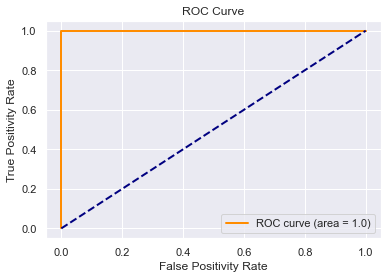

In [85]:
plot_roc(fpr_pew, tpr_pew, auc_pew)

### 7.2.  [1.5 pt]  How effective will this model be at classifying Instagram accounts in the *test dataset*?

This model will be very effective because the ROC curve had an area of 1, which is the highest possible value.

### 7.3.  [2 pt]  Finally, find a predictive probability threshold that will give you the "best" false positive rate and true positive rate for the *test dataset*.

In [86]:
pred_probabilities= final_mod.predict(exog=dict(test))
test['predictive_prob']=pred_probabilities

<ipython-input-86-762429f815ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictive_prob']=pred_probabilities


In [87]:
for i in np.arange(0, 1, 0.01):
    test['yhat']=1*(test['predictive_prob']>i)
    confusion_matrix(y_true=test['y'],y_pred=test['yhat'])
    tn, fp, fn, tp = confusion_matrix(y_true=test['y'], y_pred=test['yhat']).ravel()
    false_positive_rate=fp/(tn+fp)
    print("At p(0) = ", i)
    print("False Positive Rate: ", false_positive_rate)
    true_positive_rate=tp/(fn+tp)
    print("True Positive Rate: ", true_positive_rate)
    print("\n")

At p(0) =  0.0
False Positive Rate:  1.0
True Positive Rate:  1.0


At p(0) =  0.01
False Positive Rate:  0.3333333333333333
True Positive Rate:  1.0


At p(0) =  0.02
False Positive Rate:  0.3333333333333333
True Positive Rate:  1.0


At p(0) =  0.03
False Positive Rate:  0.3333333333333333
True Positive Rate:  1.0


At p(0) =  0.04
False Positive Rate:  0.3333333333333333
True Positive Rate:  1.0


At p(0) =  0.05
False Positive Rate:  0.3333333333333333
True Positive Rate:  1.0


At p(0) =  0.06
False Positive Rate:  0.3333333333333333
True Positive Rate:  1.0


At p(0) =  0.07
False Positive Rate:  0.3333333333333333
True Positive Rate:  1.0


At p(0) =  0.08
False Positive Rate:  0.3333333333333333
True Positive Rate:  1.0


At p(0) =  0.09
False Positive Rate:  0.3333333333333333
True Positive Rate:  1.0


At p(0) =  0.1
False Positive Rate:  0.3333333333333333
True Positive Rate:  1.0


At p(0) =  0.11
False Positive Rate:  0.3333333333333333
True Positive Rate:  1.0


At p(0) =

<ipython-input-87-7e9c58935334>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['yhat']=1*(test['predictive_prob']>i)
<ipython-input-87-7e9c58935334>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['yhat']=1*(test['predictive_prob']>i)
<ipython-input-87-7e9c58935334>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

At p(0) = 0.95